In [2]:
##Neste video iremos explicar um pouco como a analise de dados pode ajudar em nossa solução


## O primeiro passo foi baixar um dataset .csv pelo kaggle no qual podemos encontrar diversos dados de clientes do supermercado, iremos usar esses mesmos dados em nossas analises

## O dataset possui muitos atributos interessantes para usarmos, mas iremos separa-los melhor depois

## Primeiramente precisamos visualizar a tabela e para isso iremos importar a biblioteca pandas para que possamos ler os dados do CSV que escolhemos

import pandas as pd

url = "/content/drive/MyDrive/FIAP/IA STUFF/Datasets/supermarket_sales - Sheet1.csv"
df = pd.read_csv(url)
df.info()
df.head(20)

## Como podemos ver nas informações do dataset, ele não possui valores ausentes, entao não será necessário realizar a limpeza dos dados
## esta aqui é a nossa tabela completa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [3]:
## o proximo passo é separar em um subdataset com os atributos que iremos utilizar para fazer as analises, isso também irá manter uma boa organização e visualização mais limpa dos dados
sub = df[['Customer type' , 'Gender' , 'Product line' , 'Unit price' , 'Quantity' , 'Total' , 'Date' , 'Time' , 'Payment' , 'Rating']]

sub['Total'] = sub['Total'].round(2)



<ipython-input-3-a2621bdd7047>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['Total'] = sub['Total'].round(2)


In [4]:
## este é o nosso sub dataset com todos os atributos relevantes selecionados
sub.head(40)

,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating
0,Member,Female,Health and beauty,74.69,7,548.97,1/5/2019,13:08,Ewallet,9.1
1,Normal,Female,Electronic accessories,15.28,5,80.22,3/8/2019,10:29,Cash,9.6
2,Normal,Male,Home and lifestyle,46.33,7,340.53,3/3/2019,13:23,Credit card,7.4
3,Member,Male,Health and beauty,58.22,8,489.05,1/27/2019,20:33,Ewallet,8.4
4,Normal,Male,Sports and travel,86.31,7,634.38,2/8/2019,10:37,Ewallet,5.3
5,Normal,Male,Electronic accessories,85.39,7,627.62,3/25/2019,18:30,Ewallet,4.1
6,Member,Female,Electronic accessories,68.84,6,433.69,2/25/2019,14:36,Ewallet,5.8
7,Normal,Female,Home and lifestyle,73.56,10,772.38,2/24/2019,11:38,Ewallet,8.0
8,Member,Female,Health and beauty,36.26,2,76.15,1/10/2019,17:15,Credit card,7.2
9,Member,Female,Food and beverages,54.84,3,172.75,2/20/2019,13:27,Credit card,5.9


In [5]:
## agora que possuimos um dataset menor e mais organizado, podemos começar a fazer algumas análises
## a analise mais simples que podemos fazer, é analisar a media de gastos em preços unitários, preços totais, da rating (notas) dos clientes, são dados valiosos para o supermercado
## Além da média podemos analisar outros dados, como o gasto maximo que esses clientes tiveram, assim podemos saber se as estrátegias de marketing estão indo para um bom caminho
sub.describe()

,Unit price,Quantity,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966820,6.97270
std,26.494628,2.923431,245.885398,1.71858
min,10.080000,1.000000,10.680000,4.00000
25%,32.875000,3.000000,124.425000,5.50000
50%,55.230000,5.000000,253.850000,7.00000
75%,77.935000,8.000000,471.350000,8.50000
max,99.960000,10.000000,1042.650000,10.00000


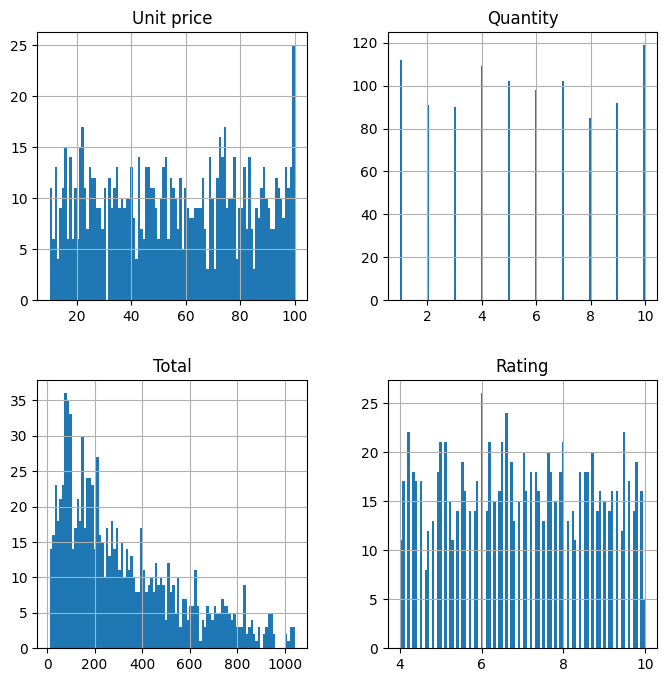

In [8]:
## Podemos criar histograma a partir dos dados do dataset, para analisar os comportamentos dos clientes
## para isso usaremos a biblioteca matplotlib

import matplotlib.pyplot as plt

sub.hist(bins=100, figsize=(8, 8))
plt.show()



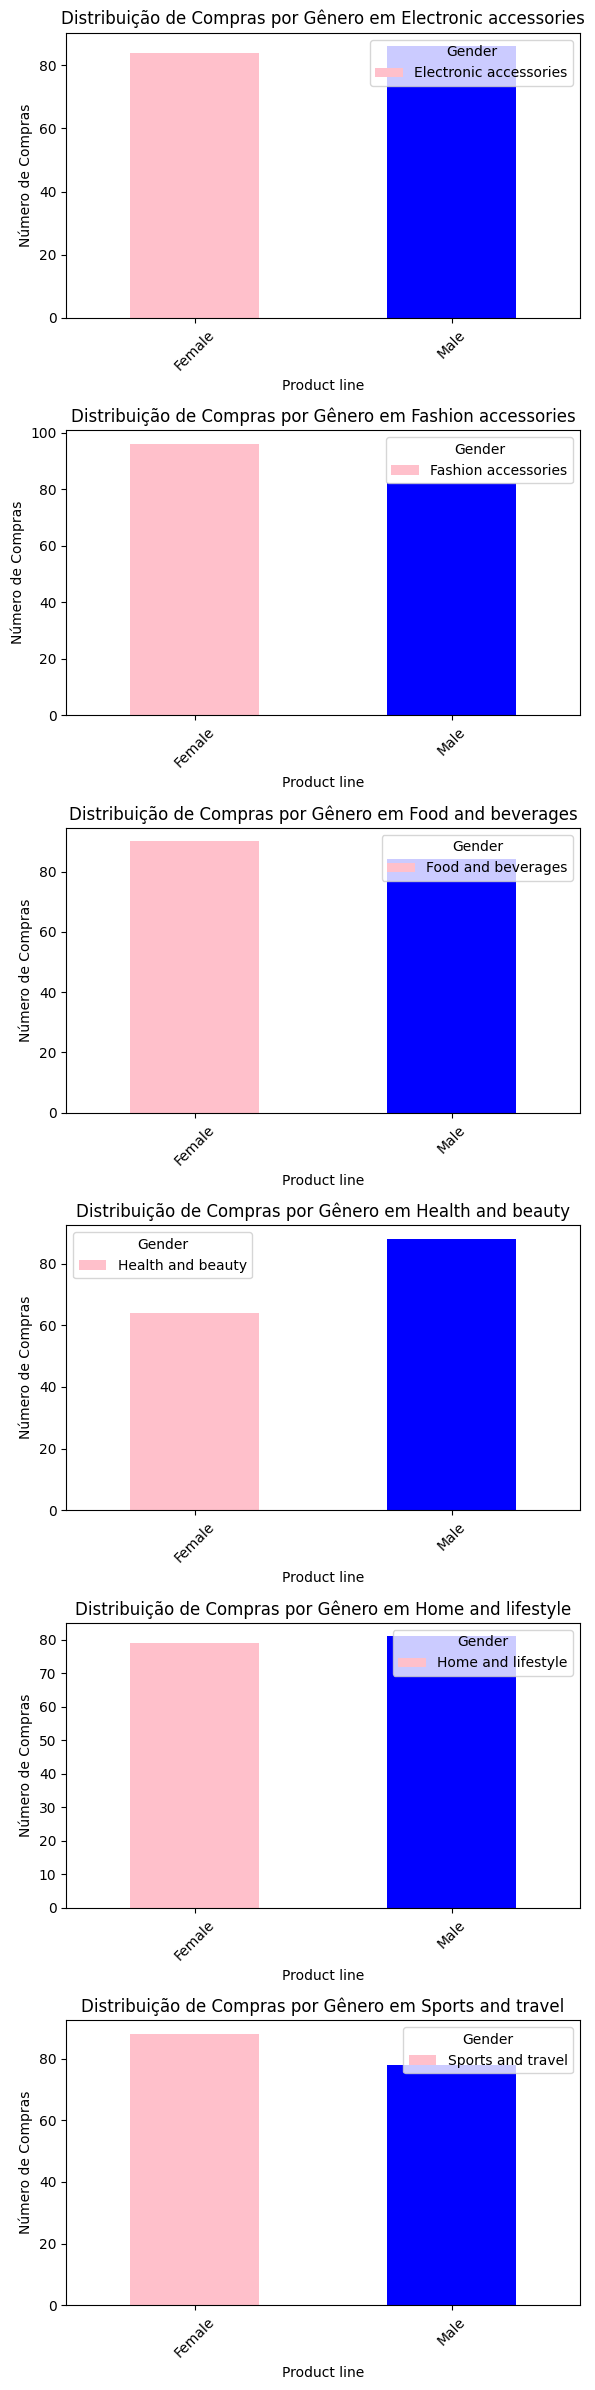

In [ ]:
## esses histogramas são uma bons para analisar os dados do dataset porém eles retornam dados gerais, independente de genero ou tipo de cliente, podemos nos aprofundar mais nesses dados para conseguirmos informações mais especificas

## Podemos analisar qual genero tende a gastar mais com determinados tipos de produtos
## Assim podemos observar qual genero está comprando mais de determinada linha de produtos, isso pode ser dados valiosos para o marketing da empresa, e entregar ofertas de determinadas linhas de produtos para generos que compram menos desse produto, afim de aumentar o ticket medio do supermercado

## para isso iremos criar um grupo com os dois atributos que iremos utilizar, "Product line e Gender"

ProductGender = sub[['Gender', 'Product line']]
grouped = ProductGender.groupby(['Product line', 'Gender']).size().unstack()

colors = {'Male': 'blue', 'Female': 'pink'}

fig, axes = plt.subplots(nrows=len(grouped.index), ncols=1, figsize=(6, 4 * len(grouped.index)))

#Aqui temos um repetição para nos ajudar a repassar por todas as linhas de produtos e retornar seus respectivos graficos
for i, product_line in enumerate(grouped.index):
    ax = grouped.loc[product_line].plot(kind='bar', stacked=True, ax=axes[i], color=[colors.get(x) for x in grouped.columns])
    ax.set_title(f'Distribuição de Compras por Gênero em {product_line}')
    ax.set_xlabel('Product line')
    ax.set_ylabel('Número de Compras')
    ax.legend(title='Gender')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

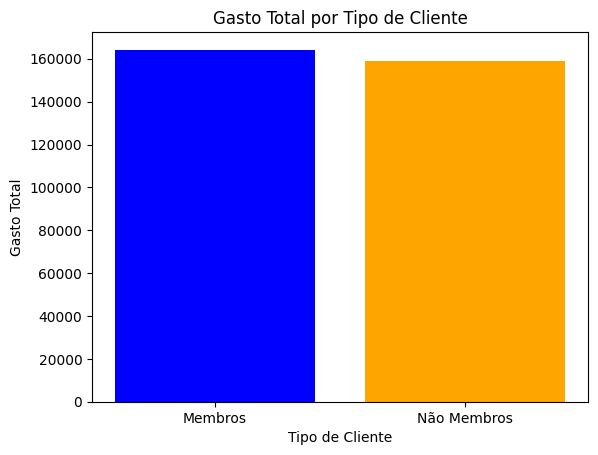

In [ ]:
## Agora iremos analisar a quantidade de gastos totais de não membros do supermercado em relação ao membros, algo muito importante de sabermos e que faz parte de nossa solução
## filtraremos com atributos Customer Type com o valor Member ou Normal, e somando o total gasto de cada tipo de cliente

membros = sub[sub['Customer type'] == 'Member']
gasto_total_membros = membros['Total'].sum()
gasto_total_nao_membros = sub[sub['Customer type'] == 'Normal']['Total'].sum()
plt.bar(['Membros', 'Não Membros'], [gasto_total_membros, gasto_total_nao_membros], color=['blue', 'orange'])
plt.title('Gasto Total por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Gasto Total')
plt.show()

## podemos analisar que por mais que uma pequena diferença os membros tendem a gastar mais do que os não membros do supermercado

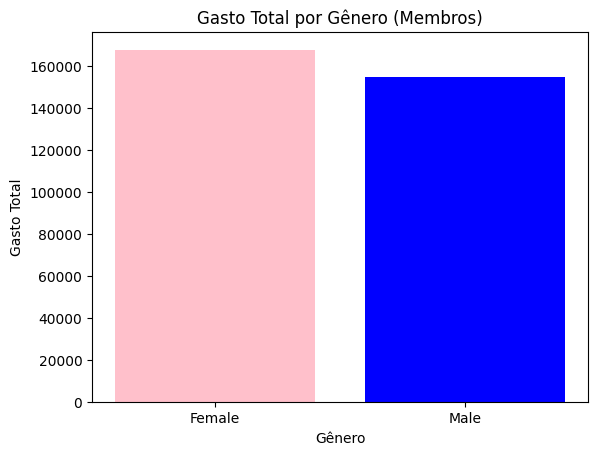

In [ ]:
## Agora iremos analisar o gasto total de acordo com os generos, assim o supermercado pode direcionar ofertas para determinados generos.

gasto_total_por_genero = sub.groupby('Gender')['Total'].sum()

plt.bar(gasto_total_por_genero.index, gasto_total_por_genero.values, color=['pink', 'blue'])
plt.title('Gasto Total por Gênero (Membros)')
plt.xlabel('Gênero')
plt.ylabel('Gasto Total')
plt.show()

<ipython-input-23-11d693d4b52f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



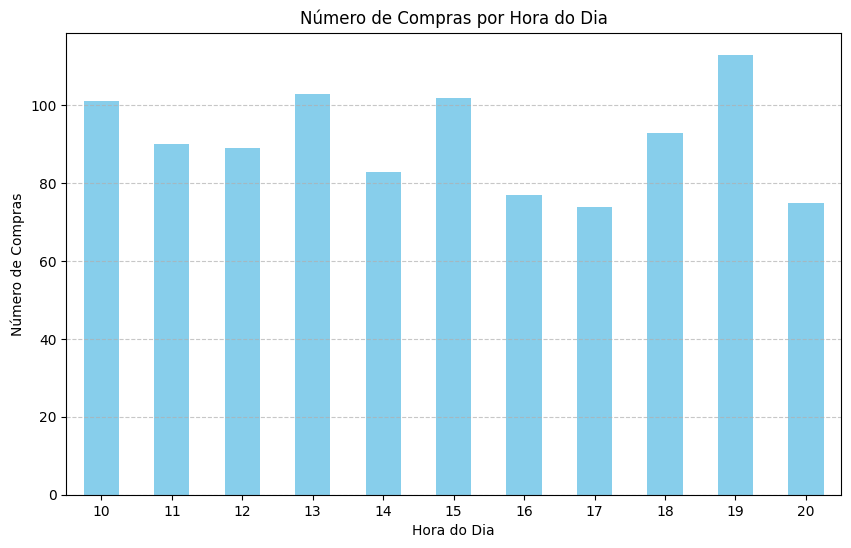

In [ ]:
##Aqui podemos analisar qual é o horario mais comum que as pessoas comprarem no supermercado, isso também é algo interessante para esquematizar ofertas futuras


sub['Hour'] = sub['Time'].str.split(':').str[0].astype(int)

compras_por_hora = sub['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
compras_por_hora.plot(kind='bar', color='skyblue')
plt.title('Número de Compras por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Compras')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
## Após vermos nossa pequena versão beta em funcionamento, podemos perceber que grande parte de nossa solução se baseia nas analises de dados, com a utilização de algumas bibliotecas e calculos, podemos retornar dados de suma importancia em formato
## de gráfico para o supermercado, como horarios de pico, preferencia de linha de produtos entre os generos, gasto recorrente de membros e nao membros, tudo isso e mais um pouco no qual implementaremos em futuras melhorias

In [ ]:
!pip install jupyter-dash

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 58.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import dash
from dash import html, dcc, Input, Output
import plotly.express as px
from jupyter_dash import JupyterDash